In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/salary_data.csv')

In [4]:
df.head()

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [19]:
X = std_scaler.fit_transform(df['experience'].values.reshape(-1, 1))
y = mm_scaler.fit_transform(df['salary'].values.reshape(-1, 1))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

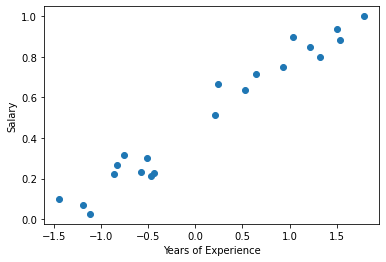

In [21]:
plt.scatter(X_train, y_train)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [22]:
line = X_train.mean() * X_train + 0.2

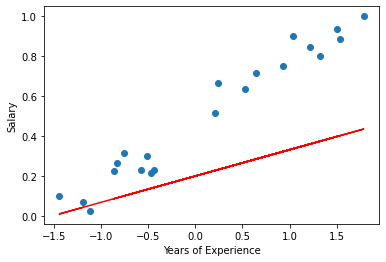

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [27]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

        self.losses = []

    def __slope(self, x, w, b):
        return np.matmul(x, w) + b

    def __loss(self, x, y, w, b):
        cost = 0
        samples = len(x)

        for i in range(0, samples):
            pred = self.__slope(x, w, b)[0]
            cost += (y[i] - pred) ** 2

        return cost/float(samples)

        # x^2 + 1
        # 2x + 0

    def __optimizer(self, x, y, w, b, learning_rate):
        dw, db = 0, 0
        samples = len(x)

        for i in range(0, samples):
            # (y - p)^2 / num_samples
            # 2 * (y - p) / num_samples
            dw += - (2 * (y[i] - self.__slope(x, w, b)[0]) * x[i]) / samples
            db += - (2 * (y[i] - self.__slope(x, w, b)[0])) / samples

        w -= learning_rate * dw.reshape(x.shape[1], 1)
        b -= learning_rate * db

        return w, b

    def fit(self, X, y, epochs=30, batch_size=8, learning_rate=0.1, verbose=1):
        lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 0.5))

        w = np.random.uniform(low= -lim, high= lim, size=(X.shape[1], 1))
        b = np.random.uniform(low= -lim, high= lim, size=1)[0]

        num_samples = len(X)

        loss = None

        for e in range(epochs):
            for offset in range(0, num_samples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X[offset:end], y[offset:end]

                loss = self.__loss(batch_x, batch_y, w, b)

                w, b = self.__optimizer(batch_x, batch_y, w, b, learning_rate)

            self.losses.append(loss)

            if((e % verbose)==0 or e==0 or e==(epochs-1)):
                print(f'Epoch {e+1}, Loss: {loss[0]:.4f}')

        self.weights = w
        self.bias = b

    def predict(self, x):
        if self.weights:
            return np.matmul(x, self.weights) + self.bias

        else:
            lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 0.5))

            w = np.random.uniform(low= -lim, high= lim, size=(X.shape[1], 1))
            b = np.random.uniform(low= -lim, high= lim, size=1)[0]

            return np.matmul(x, w) + b

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train, epochs=50, batch_size=1, learning_rate=0.1, verbose=5)

Epoch 1, Loss: 0.0130
Epoch 6, Loss: 0.0129
Epoch 11, Loss: 0.0129
Epoch 16, Loss: 0.0129
Epoch 21, Loss: 0.0129
Epoch 26, Loss: 0.0129
Epoch 31, Loss: 0.0129
Epoch 36, Loss: 0.0129
Epoch 41, Loss: 0.0129
Epoch 46, Loss: 0.0129
Epoch 50, Loss: 0.0129


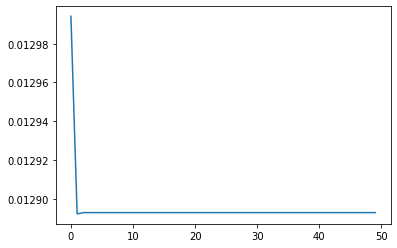

In [33]:
plt.plot(model.losses)
plt.show()

In [34]:
line = model.predict(X_train)

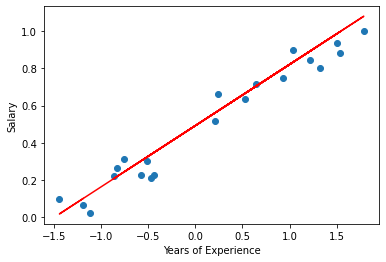

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
line = model.predict(X_train)


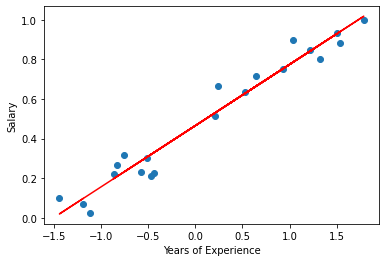

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [41]:
df = pd.read_csv('data/Ecommerce Customers')

In [42]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [47]:
X = std_scaler.fit_transform(df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values)
y = mm_scaler.fit_transform(df['Yearly Amount Spent'].values.reshape(-1, 1))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
from sklearn.metrics import mean_squared_error as mse

In [52]:
y_pred = model.predict(X_test)

In [53]:
print(f'{mse(y_pred, y_test):.4f}')

0.0004
